# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries (pandas,numpy, matplotlib etc)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlt
from matplotlib import pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Time_Series/Apple_Stock/appl_1980_2014.csv) or from the file appl_1980_2014.csv from the datasets folder.

In [17]:
apple = pd.read_csv("C:\\Users\\375930\\Python\\Python Course\\Assignment\\2. Pandas Basic Exercises\\Exercise Data Files\\Pandas Exercise Apple Stock files\\appl_1980_2014.csv")

### Step 3. Assign it to a variable apple

In [18]:
apple = pd.read_csv("C:\\Users\\375930\\Python\\Python Course\\Assignment\\2. Pandas Basic Exercises\\Exercise Data Files\\Pandas Exercise Apple Stock files\\appl_1980_2014.csv")
apple.head(2)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97


### Step 4.  Check out the type of the columns

In [19]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [20]:
apple.head(2)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97


In [21]:
apple["New_Date"] = pd.to_datetime(apple["Date"])
#help(pd.to_datetime)
apple.head(3)

,Date,Open,High,Low,Close,Volume,Adj Close,New_Date
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35,2014-07-08
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97,2014-07-07
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,2014-07-03


In [22]:
apple.dtypes

Date                 object
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
New_Date     datetime64[ns]
dtype: object

### Step 6.  Set the date as the index

In [26]:
apple.set_index("Date",inplace=True)
apple.head(3)

,Open,High,Low,Close,Volume,Adj Close,New_Date
Date,,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35,2014-07-08
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97,2014-07-07
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,2014-07-03


### Step 7.  Is there any duplicate dates?

In [33]:
a = apple.index.value_counts().reset_index()
a[a.Date > 1]

,index,Date


### Step 8.  The index is from the most recent date. Sort the data so that the first entry is the oldest date.

In [36]:
apple.sort_index(inplace=True)
apple.head(2)

,Open,High,Low,Close,Volume,Adj Close,New_Date
Date,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45,1980-12-12
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42,1980-12-15


### Step 9. Get the last business day of each month

In [74]:
from pandas.tseries.offsets import BMonthEnd
from datetime import date

offset = BMonthEnd()

#Last day of current month
apple["Business_Day"] = apple["New_Date"].apply(lambda d : offset.rollforward(d))
apple["Pre_Business_Day"] = apple["New_Date"].apply(lambda d : offset.rollback(d))
apple.head(3)

,Open,High,Low,Close,Volume,Adj Close,New_Date,Business_Day,Month,Year,Pre_Business_Day
Date,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45,1980-12-12,1980-12-31,12,1980,1980-11-28
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42,1980-12-15,1980-12-31,12,1980,1980-11-28
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,1980-12-16,1980-12-31,12,1980,1980-11-28


### Step 10.  What is the difference in days between the first day and the oldest

In [55]:
apple.New_Date.max() - apple.New_Date.min()

Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [80]:
import datetime
apple["Month"] = pd.DatetimeIndex(apple["New_Date"]).month
apple["Year"] = pd.DatetimeIndex(apple["New_Date"]).year
apple["date"] = pd.DatetimeIndex(apple["New_Date"]).day

apple.head(10)

,Open,High,Low,Close,Volume,Adj Close,New_Date,Business_Day,Month,Year,Pre_Business_Day,date
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45,1980-12-12,1980-12-31,12,1980,1980-11-28,12
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42,1980-12-15,1980-12-31,12,1980,1980-11-28,15
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,1980-12-16,1980-12-31,12,1980,1980-11-28,16
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,1980-12-17,1980-12-31,12,1980,1980-11-28,17
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,1980-12-18,1980-12-31,12,1980,1980-11-28,18
1980-12-19,28.25,28.38,28.25,28.25,12157600,0.44,1980-12-19,1980-12-31,12,1980,1980-11-28,19
1980-12-22,29.63,29.75,29.63,29.63,9340800,0.46,1980-12-22,1980-12-31,12,1980,1980-11-28,22
1980-12-23,30.88,31.00,30.88,30.88,11737600,0.48,1980-12-23,1980-12-31,12,1980,1980-11-28,23
1980-12-24,32.50,32.63,32.50,32.50,12000800,0.51,1980-12-24,1980-12-31,12,1980,1980-11-28,24


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

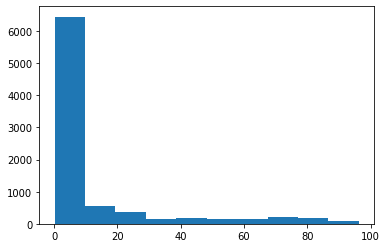

<Figure size 972x648 with 0 Axes>

In [78]:
apple.head(3)
plt.hist(apple["Adj Close"])
plt.figure(figsize=(13.5,9))
plt.show()